False Positive Paradox
Prevalenza malattia: 0.0001 (0.01%)
Sensibilità test: 99.00%
Specificità test: 98.00%

Risultato:
P(Malato | Test Positivo) = 0.0049
                          = 0.49%

 Anche con un test accurato al 98-99%,
la probabilità di essere malato è solo 0.49%!

Su 10000 persone:
- Malati: 1
- Sani: 9999
- Veri positivi: 0
- Falsi positivi: 199

I falsi positivi (199) superano
di gran lunga i veri positivi (0)!


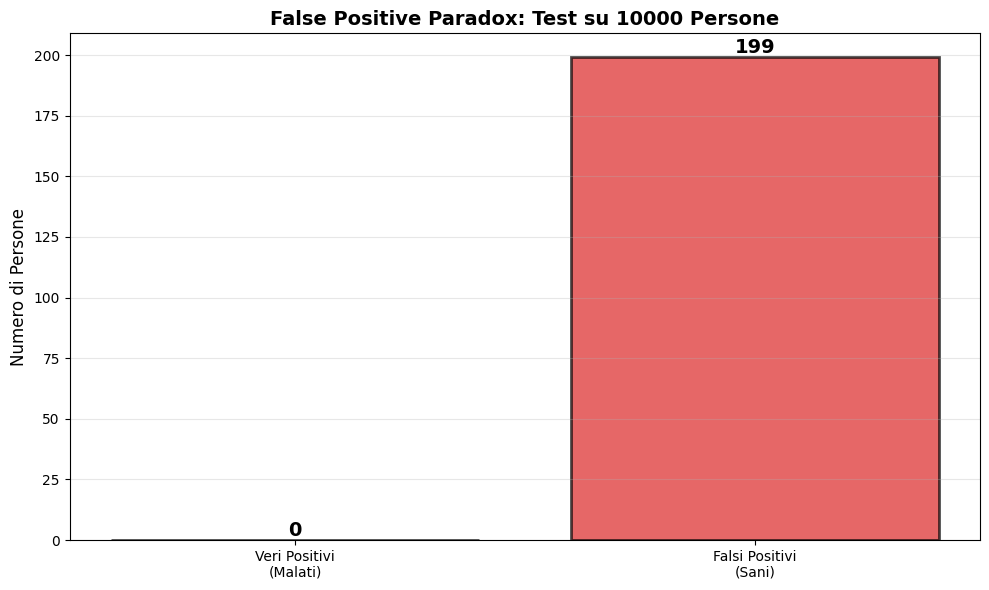

In [1]:
import matplotlib.pyplot as plt
def teorema_bayes(p_a_dato_b, p_b, p_a):
    """
    Calcola P(B|A) = P(A|B) · P(B) / P(A)
    
    Args:
        p_a_dato_b: P(A|B) - verosimiglianza
        p_b: P(B) - probabilità a priori
        p_a: P(A) - evidenza
    
    Returns:
        P(B|A) - probabilità a posteriori
    """
    return (p_a_dato_b * p_b) / p_a
def teorema_bayes_completo(p_a_dato_b, p_b, p_a_dato_non_b):
    """
    Calcola P(B|A) usando la legge della probabilità totale per P(A)
    """
    p_non_b = 1 - p_b
    p_a = p_a_dato_b * p_b + p_a_dato_non_b * p_non_b
    return teorema_bayes(p_a_dato_b, p_b, p_a)
    
# Parametri del test diagnostico
prevalenza = 0.0001  # 1 su 10,000
sensibilita = 0.99   # P(Positivo | Malato)
specificita = 0.98   # P(Negativo | Sano)

p_positivo_dato_sano = 1 - specificita  # P(Positivo | Sano) = 0.02

# Calcolo con Bayes
p_malato_dato_positivo = teorema_bayes_completo(
    p_a_dato_b=sensibilita,
    p_b=prevalenza,
    p_a_dato_non_b=p_positivo_dato_sano
)

print("False Positive Paradox")
print("="*50)
print(f"Prevalenza malattia: {prevalenza:.4f} ({prevalenza:.2%})")
print(f"Sensibilità test: {sensibilita:.2%}")
print(f"Specificità test: {specificita:.2%}")
print(f"\nRisultato:")
print(f"P(Malato | Test Positivo) = {p_malato_dato_positivo:.4f}")
print(f"                          = {p_malato_dato_positivo:.2%}")
print(f"\n Anche con un test accurato al 98-99%,")
print(f"la probabilità di essere malato è solo {p_malato_dato_positivo:.2%}!")

# Visualizzazione del paradosso
popolazione = 10000
malati = int(popolazione * prevalenza)
sani = popolazione - malati

veri_positivi = int(malati * sensibilita)
falsi_positivi = int(sani * p_positivo_dato_sano)

print(f"\nSu {popolazione} persone:")
print(f"- Malati: {malati}")
print(f"- Sani: {sani}")
print(f"- Veri positivi: {veri_positivi}")
print(f"- Falsi positivi: {falsi_positivi}")
print(f"\nI falsi positivi ({falsi_positivi}) superano")
print(f"di gran lunga i veri positivi ({veri_positivi})!")

# Grafico
fig, ax = plt.subplots(figsize=(10, 6))

categorie = ['Veri Positivi\n(Malati)', 'Falsi Positivi\n(Sani)']
valori = [veri_positivi, falsi_positivi]
colori = ['#16a34a', '#dc2626']

bars = ax.bar(categorie, valori, color=colori, alpha=0.7, edgecolor='black', linewidth=2)

for bar, val in zip(bars, valori):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val}',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

ax.set_ylabel('Numero di Persone', fontsize=12)
ax.set_title(f'False Positive Paradox: Test su {popolazione} Persone', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()